***

<center><u><H1>Strutture di controllo di flusso</H1></u></center>

***

Un **blocco di codice (code block)** è un insieme di istruzioni e dichiarazioni con uno **scopo** specifico e condiviso. In Python, un blocco di codice è identificato da una keyword seguita eventualmente da una istruzione e con i ":" a chiudere la riga; lo scopo del blocco di codice è definito in base all'indentazione. Quindi:
- tutte le istruzioni e dichiarazioni con la stessa indentazione appartengono allo stesso blocco
- se si necessita di un blocco annidato, è sufficiente aumentare l’indentazione
- Python usa 4 spazi come indentazione di default, ma qualsiasi valore è lecito
- nella riga che precede un blocco di codice, è presente almeno una keyword seguita da :

Le strutture di controllo di flusso sono dei costrutti sintattici che permettono di controllare e modificare il flusso di esecuzione di un programma:
- condizionali: decidono cosa e quando eseguire
- iterativi: ripetono il blocco di codice più volte
- interruzioni: trasferimento o interruzione del controllo dell'esecuzione


***

# 1. Condizionali

## 1.1 if-else

Costrutto di controllo di flusso che indica al programma di eseguire un blocco di codice solo se il risultato di un test logico **risulta vero**. Il blocco else è opzionale.

Per vederlo in azione, immaginiamo di trasmettere dei dati uncoded con una modulazione QPSK. La probabilità d'errore per bit è la seguente:

$$
    P_b = \frac{1}{2}\mathrm{erfc}\left(\sqrt{\frac{E_b}{N_0}}\right)
$$

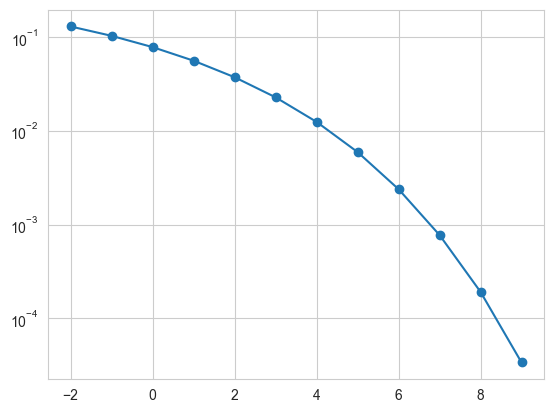

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

sns.set_style('whitegrid')

# valori di Eb/N0
eb_n0_db = np.arange(-2, 10, 1)
eb_n0 = 10**(0.1 * eb_n0_db)

# Curva teorica
bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))

# Grafico
plt.semilogy(eb_n0_db, bep, 'o-')

plt.show()


Potremmo effettuare un test di qualità del link. Ad esempio, chiediamo un valore di Eb/N0 all'utente e, data una probabilità d'errore predefinita, indichiamo se il collegamento è funzionante o meno:

In [12]:
target_bep = 1e-3  # target di BEP

eb_n0_db = float(input("Eb/N0 [dB] = "))  # input dall'utente

eb_n0 = 10**(0.1 * eb_n0_db)  # conversione in lineare

achieved_bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))  # BEP raggiunta

if achieved_bep <= target_bep:
    print(f"Connesso! Pe = {achieved_bep}")

Connesso! Pe = 3.872108215522035e-06


Aggiungiamo un blocco di codice che viene eseguito quando la condizione non si verifica:

In [13]:
target_bep = 1e-3  # target di BEP

eb_n0_db = float(input("Eb/N0 [dB] = "))  # input dall'utente

eb_n0 = 10**(0.1 * eb_n0_db)  # conversione in lineare

achieved_bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))  # BEP raggiunta

if achieved_bep <= target_bep:
    print(f"Connesso! Pe = {achieved_bep}")
else:
    print(f"Non connesso...Pe = {achieved_bep}")

Non connesso...Pe = 0.07864960352514258


## 1.2 if-elif-else

Possiamo aggiungere delle condizioni ulteriori da verificare con **elif**. Attenzione: **non appena una condizione si verifica, le altre non sono controllate**.

In [21]:
target_bep_low = 1e-2  # target di BEP per bassa qualità
target_bep_high = 1e-4  # target di BEP per alta qualità

eb_n0_db = float(input("Eb/N0 [dB] = "))  # input dall'utente

eb_n0 = 10**(0.1 * eb_n0_db)  # conversione in lineare

achieved_bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))  # BEP raggiunta

if achieved_bep > target_bep_low:
    print(f"Non connesso...Pe = {achieved_bep}")
elif achieved_bep <= target_bep_low and achieved_bep > target_bep_high:
    print(f"Connesso con bassa qualità: Pe = {achieved_bep}")
else:
    print(f"Connesso con alta qualità: Pe = {achieved_bep}")

Connesso con alta qualità: Pe = 3.872108215522035e-06


## 1.3 Operatori short-hand

Quando si ha una singola istruzione nei blocchi di codice, si possono scrivere if ed if-elif in modo semplificato:

In [23]:
target_bep = 1e-3  # target di BEP
eb_n0_db = float(input("Eb/N0 [dB] = "))  # input dall'utente
eb_n0 = 10**(0.1 * eb_n0_db)  # conversione in lineare
achieved_bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))  # BEP raggiunta

if achieved_bep <= target_bep: print(f"Connesso! Pe = {achieved_bep}")

print(f"Connesso! Pe = {achieved_bep}") if achieved_bep <= target_bep else print(f"Non connesso...Pe = {achieved_bep}")

Connesso! Pe = 3.872108215522035e-06
Connesso! Pe = 3.872108215522035e-06


## 1.4 Nested if

Creiamo un codice che permetta all'utente di indovinare un numero tra 1 e 10:

In [31]:
answer = 5  # la fissiamo per poter verificare il codice
guess = int(input("Inserire un numero da 1 a 10: "))

if guess < answer:
    print("Please guess higher")
    guess = int(input())
    if guess == answer:
        print("Well done, you guessed it")
    else:
        print("Sorry, you have not guessed correctly")
elif guess > answer:
    print("Please guess lower")
    guess = int(input())
    if guess == answer:
        print("Well done, you guessed it")
    else:
        print("Sorry, you have not guessed correctly")
else:
    print("You got it first time")

Please guess higher
Sorry, you have not guessed correctly


C'è molto codice duplicato...chiaro segno che possiamo ottimizzare:

In [32]:
answer = 5
guess = int(input("Inserire un numero da 1 a 10: "))

if guess == answer:
    print("You got it first time")
else:
    if guess < answer:
        print("Please guess higher")
    else:   # guess must be greater than answer
        print("Please guess lower")
    guess = int(input())
    if guess == answer:
        print("Well done, you guessed it")
    else:
        print("Sorry, you have not guessed correctly")

Please guess lower
Sorry, you have not guessed correctly


## 1.5 Operatori logici e variabili booleane

- quando si usa **and**, Python ferma il check sulle condizioni non appena incontra un **False**: tutte devono infatti essere vere per ottenere un True
- quando si usa **or**, Python ferma il check sulle condizioni non appena incontra un **True**: è sufficiente una singola condizione True

In [33]:
a = 200
b = 33
c = 500
if a > b and c > a:
    print("Both conditions are True")

a = 200
b = 33
c = 500
if a > b or a > c:
    print("At least one of the conditions is True")

Both conditions are True
At least one of the conditions is True


**Espressione booleana**: espressione che fornisce una variabile booleana come risultato, ovvero True o False.

- per invertire una variabile booleana, si usa la keyword **not**
- anche gli operatori logici hanno una precedenza predefinita, da tenere a mente nel creare espressioni booleane complesse
    - permettono anche di comprendere più facilmente il codice

In [34]:
condition = True

if not condition: print("La condizione è falsa")

print("La condizione è falsa") if not condition else print("La condizione è vera")

La condizione è vera


In Python, False è equivalente anche a:
- None
- 0 di un qualsiasi tipo di dato numerico
- sequenze o collezioni vuote

In [35]:
if 1:
    print("True")
else:
    print("False")

name = input("Please enter your name: ")
if name:  # utile per verificare che si sia inserito qualcosa
    print("Hello, {}".format(name))
else:
    print("Are you the man with no name?")

True
Hello, Alessandro


In Python, è possibile semplificare le condizioni numeriche negli if. Le due soluzioni seguenti sono equivalenti:

In [36]:
value = 5
min = 0
max = 10

if min <= value <= max:
    print("Valore lecito")

if (min <= value) and (value <= max):
    print("Valore lecito")

Valore lecito
Valore lecito


E’ possibile effettuare delle verifiche anche sulle stringhe. In particolare:
- in permette di controllare se una sotto-stringa è contenuta nella stringa di riferimento
- not in permette di controllare se una sotto-stringa non è contenuta nella stringa di riferimento

Si possono utilizzare anche per dei check di tipo numerico, ma per verificarlo dovremo prima introdurre i range.

In [37]:
name = "Obi-wan Kenobi"

letter = input("Enter a character: ")

if letter in name:
    print("{} IS in {}".format(letter, name))
else:
    print("{} IS NOT in {}".format(letter, name))

activity = input("Cosa ti piacerebbe fare oggi? ")

# not in
if "cinema" not in activity.casefold():
    print("Ma io voglio andare al cinema...")

k IS NOT in Obi-wan Kenobi
Ma io voglio andare al cinema...


## 1.6 match-case

Struttura che permette di verificare in successione il valore di una espressione di controllo che viene valutata una singola volta e (potenzialmente) confrontata con tutti i casi elencati, Non appena un caso si verifica, si eseguono le istruzioni contenute nel blocco di codice e si esce dalla struttura. E' estremamente utile quando si ha un numero di casi ben definito, ad esempio per caricare i parametri di un simulatore in base al numero dello scenario da considerare.

Come primo esempio, immaginiamo di prendere in ingresso dall'utente la Power Class di uno User Equipment (UE) 3GPP per 5G e di fornire in uscita l'applicazione prevista. Dato che esistono 7 power class, possiamo anche inserire un caso di default casomai l'utente inserisse un valore non previsto.  

In [6]:
ue_power_class = int(input("Power Class: "))

match ue_power_class:
    
    case 1 | 5:  # opzioni multiple
        ue_application = "Fixed Wireless Access"
    case 2:
        ue_application = "Vehicular UE"
    case 3:
        ue_application = "Handheld UE"
    case 4:
        ue_application = "High Power non-handheld UE"
    case 6:
        ue_application = "High Speed Train roof-mounted UE"
    case 7:
        ue_application = "RedCap UE"
    case other:
        ue_application = "power class not available"

print(f"Applicazione: {ue_application}")
        

Applicazione: Fixed Wireless Access


## 1.7 try-except

Costrutto fondamentale per la gestione delle eventuali eccezioni che possono presentarsi nel codice, soprattutto quando un utente utilizza in modo non del tutto corretto del codice. Ad esempio, si potrebbe chiedere l'inserimento di un intero ma l'utente inserisce un carattere:

In [39]:
my_value = int(input("Inserire un intero da 1 a 4: "))

ValueError: invalid literal for int() with base 10: 'a'

Questa operazione solleva una eccezione di tipo **ValueError**, che possiamo gestire per evitare interruzioni indesiderate del programma. Torniamo all'esempio della BER:

In [24]:
target_bep = 1e-3  # target di BEP

try:
    eb_n0_db = float(input("Eb/N0 [dB] = "))  # input dall'utente

    eb_n0 = 10**(0.1 * eb_n0_db)  # conversione in lineare

    achieved_bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))  # BEP raggiunta

    if achieved_bep <= target_bep:
        print(f"Connesso! Pe = {achieved_bep}")
    else:
        print(f"Non connesso...Pe = {achieved_bep}")
except ValueError:
    print("E' richiesto un float in ingresso.")

E' richiesto un float in ingresso.


E' possibile inserire, come opzioni, dei blocchi aggiuntivi:
- else, un blocco che viene eseguito se non si presentano errori (ovvero se non si entra nel blocco relativo ad except);
- finally, un blocco di codice che viene sempre eseguito indipendentemente dalle eccezioni.

Vediamo il loro funzionamento in esempi semplici prima di applicarlo al nostro codice:
- esecuzione normale

In [1]:
try:
    print("Hello!")
except NameError:
    print("NameError exception!")
else:
    print("No NameError exception")
finally:
    print("Finally block")

Hello!
No NameError exception
Finally block


- eccezione gestita

In [2]:
try:
    print(my_variable)
except NameError:
    print("NameError exception!")
else:
    print("No NameError exception")
finally:
    print("Finally block")

NameError exception!
Finally block


- eccezione non gestita

In [3]:
try:
    print(1/0)
except NameError:
    print("NameError exception!")
else:
    print("No NameError exception")
finally:
    print("Finally block")

Finally block


ZeroDivisionError: division by zero

Vediamo come applicare queste utili funzionalità al nostro codice della BER:

In [11]:
import numpy as np
import scipy

target_bep = 1e-3  # target di BEP

try:
    eb_n0_db = float(input("Eb/N0 [dB] = "))  # input dall'utente
except ValueError:
    print("E' richiesto un float in ingresso.")
else:
    eb_n0 = 10**(0.1 * eb_n0_db)  # conversione in lineare

    achieved_bep = 0.5 * scipy.special.erfc(np.sqrt(eb_n0))  # BEP raggiunta

    if achieved_bep <= target_bep:
        print(f"Connesso! Pe = {achieved_bep}")
    else:
        print(f"Non connesso...Pe = {achieved_bep}")
finally:
    print("Chiusura dell'applicazione.")

Connesso! Pe = 3.872108215522035e-06
Chiusura dell'applicazione.


E' anche possibile definire delle nuove eccezioni o sollevarle. Per la definizione, è necessario che avanziamo fino alla programmazione ad oggetti. Vediamo quindi come sollevare una nostra eccezione con un messaggio dedicato:

- sfruttando delle eccezioni esistenti

In [26]:
x = "hello"

if type(x) is not int:
  raise TypeError("Only integers are allowed")

TypeError: Only integers are allowed

- tramite una eccezione generica, in quanto dobbiamo ancora vedere come crearne di nuove

In [27]:
x = -1

if x < 0:
  raise Exception("Sorry, no numbers below zero")

Exception: Sorry, no numbers below zero

***

# 2. Repetition control flow

## 2.1 For

Permette l’**esecuzione ripetuta** di una serie di istruzioni, per un **numero predefinito di volte**.

Il principio di base è l’iterazione su un insieme di valori, appartenenti ad una **sequenza** o un altro oggetto di tipo **iterable**
- iterable: qualsiasi oggetto su cui sia possibile iterare
- una stringa è un iterable e, in particolare, una sequenza

In [43]:
my_string = "This is the way"

for character in my_string:
    print(character)

T
h
i
s
 
i
s
 
t
h
e
 
w
a
y


- per interromperlo o saltare una iterazione al verificarsi di una condizione, si deve usare un break o un continue
- è sconsigliato modificare il valore dell’indice all’interno del ciclo
- se l’oggetto su cui si itera ha più di un valore, si può utilizzare più di una variabile di iterazione

In [44]:
my_string = "This is the way"

for character in my_string:
    if character=="i":
        pass
        # break
        # continue
    print(character)

T
h
i
s
 
i
s
 
t
h
e
 
w
a
y


Per avere un ciclo for che si comporta in modo simile ad altri linguaggi, possiamo iterare su un oggetto **range**. I range funzionano in modo simile alle slice:
- forniscono una sequenza di valori fino a stop escluso
- start è opzionale con default a 0
- step è opzionale con default a 1
- come nelle slice, si può creare il range in modo decrescente con step negativo
- si possono utilizzare per verificare se un valore è interno al range

In [45]:
for i in range(1, 11):
    print("valore corrente di i: {}".format(i))
print("-"*80)

for i in range(1, 11, 3):
    print("valore corrente di i: {}".format(i))
print("-"*80)

for i in range(11):
    print("valore corrente di i: {}".format(i))
print("-"*80)

for i in range(10, 0, -1):
    print("valore corrente di i: {}".format(i))

valore corrente di i: 1
valore corrente di i: 2
valore corrente di i: 3
valore corrente di i: 4
valore corrente di i: 5
valore corrente di i: 6
valore corrente di i: 7
valore corrente di i: 8
valore corrente di i: 9
valore corrente di i: 10
--------------------------------------------------------------------------------
valore corrente di i: 1
valore corrente di i: 4
valore corrente di i: 7
valore corrente di i: 10
--------------------------------------------------------------------------------
valore corrente di i: 0
valore corrente di i: 1
valore corrente di i: 2
valore corrente di i: 3
valore corrente di i: 4
valore corrente di i: 5
valore corrente di i: 6
valore corrente di i: 7
valore corrente di i: 8
valore corrente di i: 9
valore corrente di i: 10
--------------------------------------------------------------------------------
valore corrente di i: 10
valore corrente di i: 9
valore corrente di i: 8
valore corrente di i: 7
valore corrente di i: 6
valore corrente di i: 5
valore co

Si possono naturalmente creare cicli annidati con indentazioni aggiuntive:

In [46]:
for i in range(1, 6):
    for j in range(1, 6):
        print("{0} times {1} is {2}".format(j, i, i * j))
    print("------------------")

1 times 1 is 1
2 times 1 is 2
3 times 1 is 3
4 times 1 is 4
5 times 1 is 5
------------------
1 times 2 is 2
2 times 2 is 4
3 times 2 is 6
4 times 2 is 8
5 times 2 is 10
------------------
1 times 3 is 3
2 times 3 is 6
3 times 3 is 9
4 times 3 is 12
5 times 3 is 15
------------------
1 times 4 is 4
2 times 4 is 8
3 times 4 is 12
4 times 4 is 16
5 times 4 is 20
------------------
1 times 5 is 5
2 times 5 is 10
3 times 5 is 15
4 times 5 is 20
5 times 5 is 25
------------------


Se non si è sicuri di riuscire a ottenere un valore richiesto, è sempre opportuno inizializzare una variabile:
- None è una costante che indica un valore nullo, particolarmente utile per assegnare una variabile che non ancora assume un valore lecito
- è un tipo di dato **NoneType**

In [47]:
found = None

for value in range(10,20):
    if value == 1:
        found = True

if found:
    print(found)
    
del found

In Python, c'è una funzionalità estremamente utile tramite la funzione **enumerate()**. Se volessimo ottenere l'elemento e la sua posizione, in teoria dovremmo iterare sull'oggetto e ricavare l'indice dell'elemento oltre al suo valore:

In [22]:
import time
my_string = "This is the way"

start_time = time.time()
for character in my_string:
    char_index = my_string.index(character)
    print(f"{char_index}: {character}")
end_time = time.time()
print(f"Elapsed time: {start_time - end_time}")

0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10: e
4:  
12: w
13: a
14: y
0: T
1: h
2: i
3: s
4:  
2: i
3: s
4:  
8: t
1: h
10

Proviamo ora con la funzione enumerate(), che fornisce in uscita una tuple (le vedremo presto) che contiene sia l'indice sia il valore dell'elemento:

In [21]:
import time
my_string = "This is the way"

start_time = time.time()
for index, character in enumerate(my_string):
    print(f"{index}: {character}")
end_time = time.time()
print(f"Elapsed time: {start_time - end_time}")

0: T
1: h
2: i
3: s
4:  
5: i
6: s
7:  
8: t
9: h
10: e
11:  
12: w
13: a
14: y
15: T
16: h
17: i
18: s
19:  
20: i
21: s
22:  
23: t
24: h
25: e
26:  
27: w
28: a
29: y
30: T
31: h
32: i
33: s
34:  
35: i
36: s
37:  
38: t
39: h
40: e
41:  
42: w
43: a
44: y
45: T
46: h
47: i
48: s
49:  
50: i
51: s
52:  
53: t
54: h
55: e
56:  
57: w
58: a
59: y
60: T
61: h
62: i
63: s
64:  
65: i
66: s
67:  
68: t
69: h
70: e
71:  
72: w
73: a
74: y
75: T
76: h
77: i
78: s
79:  
80: i
81: s
82:  
83: t
84: h
85: e
86:  
87: w
88: a
89: y
90: T
91: h
92: i
93: s
94:  
95: i
96: s
97:  
98: t
99: h
100: e
101:  
102: w
103: a
104: y
105: T
106: h
107: i
108: s
109:  
110: i
111: s
112:  
113: t
114: h
115: e
116:  
117: w
118: a
119: y
120: T
121: h
122: i
123: s
124:  
125: i
126: s
127:  
128: t
129: h
130: e
131:  
132: w
133: a
134: y
135: T
136: h
137: i
138: s
139:  
140: i
141: s
142:  
143: t
144: h
145: e
146:  
147: w
148: a
149: y
150: T
151: h
152: i
153: s
154:  
155: i
156: s
157:  
158:

## 2.2 While

 
Esegue un blocco di codice finché la condizione specificata risulta **vera**.
- la condizione viene valutata prima che l’iterazione sia eseguita: almeno una iterazione è garantita, se la condizione di partenza è vera
    - a differenza del for, dobbiamo inizializzare la condizione prima
- la condizione va aggiornata internamente al ciclo
    - fondamentale, altrimenti si rischia un ciclo infinito a meno di inserire un break con una condizione
- utile quando non si conosce a priori il numero di iterazioni
- anche i cicli for e while possono essere scritti su una riga se contengono una singola istruzione

In [48]:
for i in range(10):
    print("i is now {}".format(i))

i is now 0
i is now 1
i is now 2
i is now 3
i is now 4
i is now 5
i is now 6
i is now 7
i is now 8
i is now 9


In [49]:
#i = 0
#while True:
 #   print("i is now {}".format(i))
  #  i += 1

In [50]:
i = 0
while i in range(10): # i < 10 più efficiente
    print("i is now {}".format(i))
    i += 1

i is now 0
i is now 1
i is now 2
i is now 3
i is now 4
i is now 5
i is now 6
i is now 7
i is now 8
i is now 9


Esempio di ciclo while con True e break interni:

In [53]:
import random

highest = 1000
answer = random.randint(1, highest)
print(answer)   # TODO: Remove after testing
guess = 0 # initialise to any number that doesn't equal the answer
print("Please guess number between 1 and {}: ".format(highest))

while guess != answer:
    guess = int(input())

    if guess == 0:
        print("Shutting down...")
        break
    if guess == answer:
        print("Well done, you guessed it")
        break
    else:
        if guess < answer:
            print("Please guess higher")
        else:   # guess must be greater than answer
            print("Please guess lower")

955
Please guess number between 1 and 1000: 
Please guess higher
Please guess higher
Please guess higher
Please guess lower
Please guess lower
Please guess lower
Please guess lower
Please guess higher
Please guess higher
Well done, you guessed it


I cicli in Python possono avere un loro blocco else: il codice viene eseguito solamente se il ciclo è stato portato a compimento, ovvero senza incorrere in un break. Un esempio di applicazione è il seguente:

In [24]:
for n in range(3):
    password = input("Password: ")
    if password == "myPassword":
        print("Authorized.")
        break
    print("Password is incorrect.")
else:
    print("Suspicious activity. The authorities have been alerted.")

Password is incorrect.
Password is incorrect.
Password is incorrect.
Suspicious activity. The authorities have been alerted.
